In [61]:
from ultralytics import YOLO
import cv2
import numpy as np
from src import config, image_utils

## Load pretrained YOLOv9 model

In [62]:
model = YOLO(config.YOLO_MODEL_PATH)

In [63]:
img = cv2.imread('./../datasets/images/test/23.jpeg')

In [64]:
results = model(
    img, 
    device=config.YOLO_DEVICE, 
    conf=0.98,
    imgsz=800
)

0: 800x608 53 holds, 1015.0ms
Speed: 4.2ms preprocess, 1015.0ms inference, 0.9ms postprocess per image at shape (1, 3, 800, 608)


## Get first result

In [65]:
result = results[0]

In [66]:
print(result.names)

{0: 'hold', 1: 'volume'}


In [67]:
bboxes = np.array(result.boxes.xyxy.cpu(), dtype=int)
classes = np.array(result.boxes.cls.cpu(), dtype=int)
centers = (bboxes[:, :2] + bboxes[:, 2:]) / 2

# Draw bounding boxes

In [68]:
image_utils.draw_bboxes(
    img, 
    bboxes, 
    classes, 
    result.names,
    centers, 
    config.BBOX_COLOR, 
    config.BBOX_CENTER_COLOR, 
    config.LINE_WIDTH
)

## Draw the preview

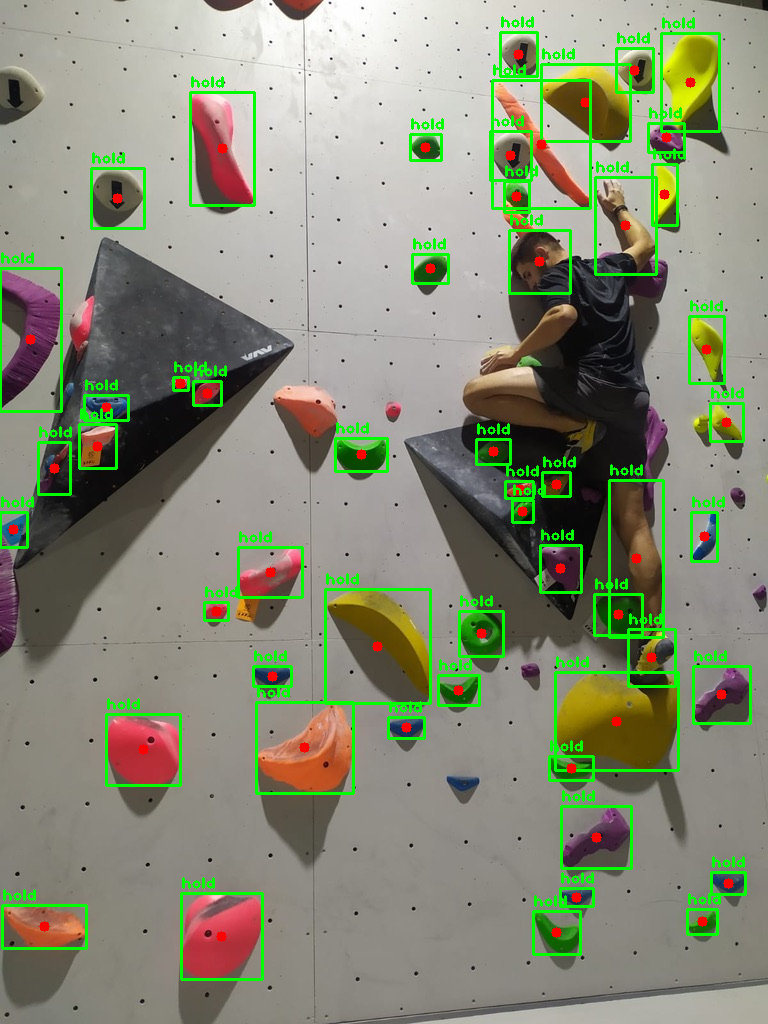

In [69]:
image_utils.display_image(img)